In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load embeddings file

# input the path to your saved embeddings
path = '/Users/ellenbowen/Desktop/Michigan/Siwo_lab/'
file = str(path) + 'phecode_gpt_embedding.pkl'

df = pd.read_pickle(file)

In [3]:
df

,phecode,phenotype,phecode_exclude_range,sex,rollup,leaf,category_number,category,embeddings
0,8.00,Intestinal infection,001-009.99,NaN,1,0,1,infectious diseases,"[0.0068802302703261375, 0.0005461262771859765,..."
1,8.50,Bacterial enteritis,001-009.99,Both,1,0,1,infectious diseases,"[-0.010700925253331661, 1.566567698318977e-05,..."
2,8.51,Intestinal e.coli,001-009.99,Both,1,1,1,infectious diseases,"[0.01900758408010006, -0.0076250554993748665, ..."
3,8.52,Intestinal infection due to C. difficile,001-009.99,Both,1,1,1,infectious diseases,"[0.013732682913541794, -0.013513063080608845, ..."
4,8.60,Viral Enteritis,001-009.99,Both,1,1,1,infectious diseases,"[-0.01282576099038124, -0.0019294519443064928,..."
...,...,...,...,...,...,...,...,...,...
1861,994.00,Sepsis and SIRS,994-994.99,NaN,1,0,18,injuries & poisonings,"[-0.009411283768713474, -0.011322950012981892,..."
1862,994.10,Systemic inflammatory response syndrome (SIRS),994-994.99,Both,1,1,18,injuries & poisonings,"[-0.036918796598911285, -0.012674717232584953,..."
1863,994.20,Sepsis,994-994.99,Both,1,0,18,injuries & poisonings,"[0.004166525788605213, -0.005852119065821171, ..."
1864,994.21,Septic shock,994-994.99,Both,1,1,18,injuries & poisonings,"[-0.012952380813658237, 0.0007000957266427577,..."


In [55]:
# Ensure embeddings are numpy arrays
df['embeddings'] = df['embeddings'].apply(lambda x: np.array(x))

# Convert the embeddings column to a 2D numpy array
embeddings = np.vstack(df['embeddings'].values)

# Compute Cosine Similarity
def compute_cosine_similarity(embeddings):
    return cosine_similarity(embeddings)

cosine_sim_matrix = compute_cosine_similarity(embeddings)
#np.fill_diagonal(cosine_sim_matrix, 0)  # Ensure no self-correlations

# Make cosine_sim_matrix search tool 


In [ ]:
np.corr

cutoff = determine_cutoff(correlations)

# Filter top correlations based on the cutoff
significant_indices = top_correlations >= cutoff
significant_pairs = top_pairs[significant_indices]
significant_correlations = top_correlations[significant_indices]

# Create a mask for significant correlations
mask = np.ones_like(cosine_sim_matrix)
for (i, j), corr in zip(significant_pairs, significant_correlations):
    mask[i, j] = corr

# Set non-significant correlations to NaN
cosine_sim_matrix_significant = np.where(mask == 1, np.nan, mask)

phenotype_names = df['phenotype'].values

# Create a DataFrame for the heatmap with phenotype names as labels
heatmap_df = pd.DataFrame(cosine_sim_matrix_significant, index=phenotype_names, columns=phenotype_names)

# Create a heatmap using seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_df, cmap="YlGnBu", annot=False, fmt=".2f", mask=np.isnan(heatmap_df))
plt.title("Heatmap of Significant Correlations")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

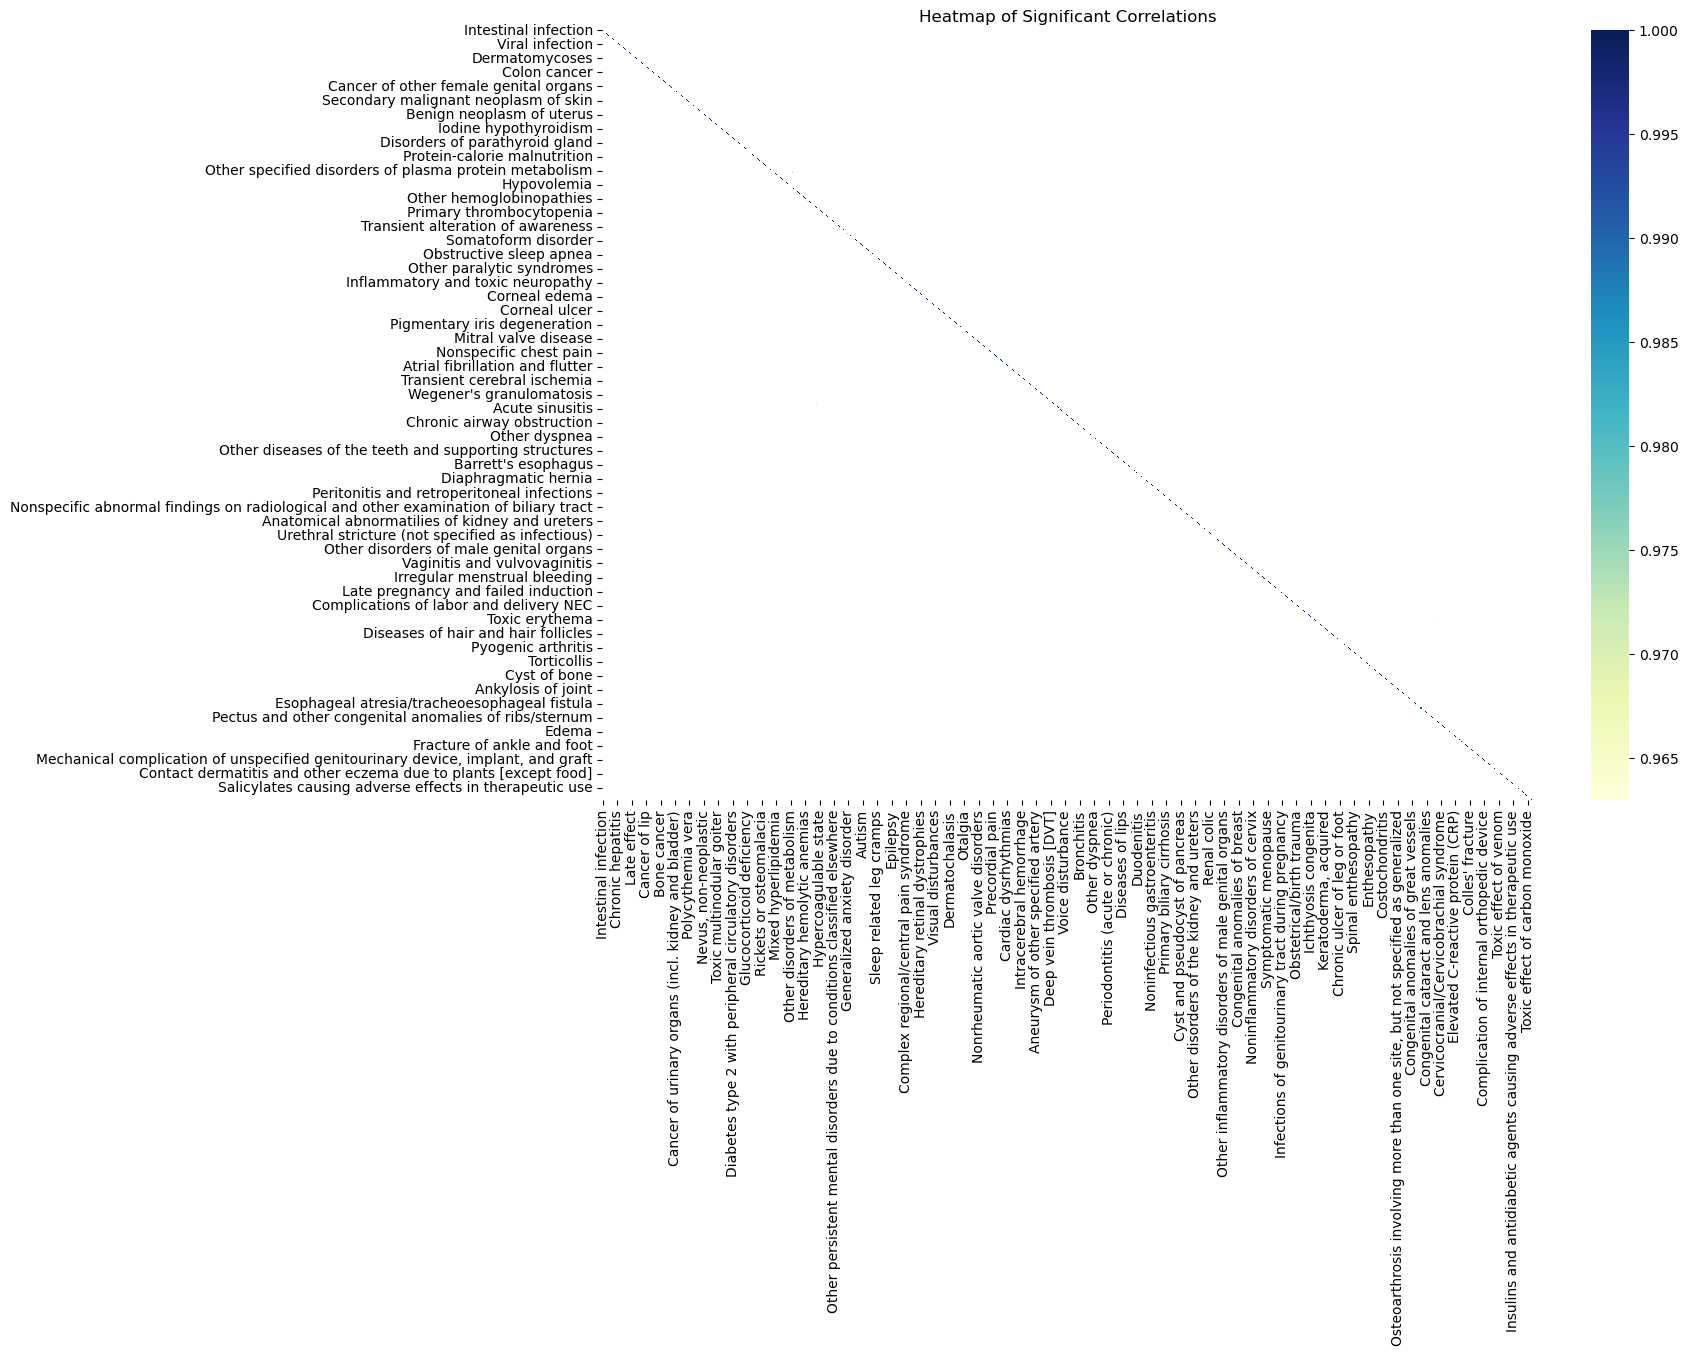

In [63]:
def determine_cutoff(correlations, significance_level=0.01):
    mean_corr = np.mean(correlations)
    std_corr = np.std(correlations)
    cutoff = norm.ppf(1 - significance_level, loc=mean_corr, scale=std_corr)
    return cutoff

def find_top_correlations(cosine_sim_matrix, top_percent=1):
    flattened = cosine_sim_matrix.flatten()
    sorted_indices = np.argsort(flattened)[::-1]
    num_top_correlations = int(len(flattened) * (top_percent / 100))
    top_indices = sorted_indices[:num_top_correlations]
    top_correlations = flattened[top_indices]
    top_pairs = np.array(np.unravel_index(top_indices, cosine_sim_matrix.shape)).T
    return top_pairs, top_correlations

top_pairs, top_correlations = find_top_correlations(cosine_sim_matrix, top_percent=1)
cutoff = determine_cutoff(top_correlations)

# Filter top correlations based on the cutoff
significant_indices = top_correlations >= cutoff
significant_pairs = top_pairs[significant_indices]
significant_correlations = top_correlations[significant_indices]

# Create a mask for significant correlations
mask = np.ones_like(cosine_sim_matrix)
for (i, j), corr in zip(significant_pairs, significant_correlations):
    mask[i, j] = corr

# Set non-significant correlations to NaN
cosine_sim_matrix_significant = np.where(mask == 1, np.nan, mask)

phenotype_names = df['phenotype'].values

# Create a DataFrame for the heatmap with phenotype names as labels
heatmap_df = pd.DataFrame(cosine_sim_matrix_significant, index=phenotype_names, columns=phenotype_names)

# Create a heatmap using seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_df, cmap="YlGnBu", annot=False, fmt=".2f", mask=np.isnan(heatmap_df))
plt.title("Heatmap of Significant Correlations")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [45]:
cosine_sim_matrix[0]

array([1.        , 0.8883676 , 0.90763479, ..., 0.82831798, 0.82463118,
       0.77483157])

(array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([0.65223719, 0.66382929, 0.67542138, 0.68701347, 0.69860557,
        0.71019766, 0.72178975, 0.73338185, 0.74497394, 0.75656604,
        0.76815813, 0.77975022, 0.79134232, 0.80293441, 0.8145265 ,
        0.8261186 , 0.83771069, 0.84930278, 0.86089488, 0.87248697,
        0.88407906, 0.89567116, 0.90726325, 0.91885535, 0.93044744,
        0.94203953, 0.95363163, 0.96522372, 0.97681581, 0.98840791,
        1.        ]),
 <a list of 1866 BarContainer objects>)

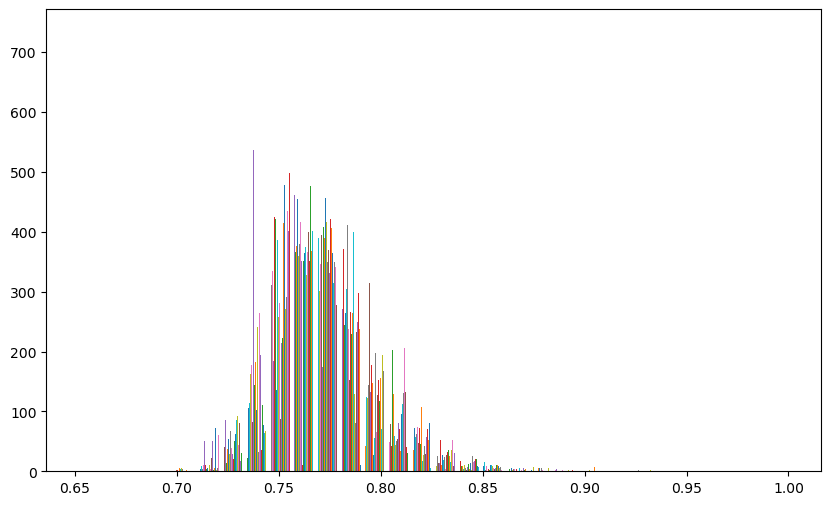

In [52]:

plt.figure(figsize=(10,6))
plt.hist(cosine_sim_matrix[0], bins=30)

In [56]:

# Find Top Correlations
def find_top_correlations(cosine_sim_matrix, top_percent=1):
    flattened = cosine_sim_matrix.flatten()
    sorted_indices = np.argsort(flattened)[::-1]
    num_top_correlations = int(len(flattened) * (top_percent / 100))
    top_indices = sorted_indices[:num_top_correlations]
    top_correlations = flattened[top_indices]
    top_pairs = np.array(np.unravel_index(top_indices, cosine_sim_matrix.shape)).T
    return top_pairs, top_correlations

top_pairs, top_correlations = find_top_correlations(cosine_sim_matrix, top_percent=1)

# Determine Cutoff of Significance
def determine_cutoff(correlations, significance_level=0.01):
    mean_corr = np.mean(correlations)
    std_corr = np.std(correlations)
    cutoff = norm.ppf(1 - significance_level, loc=mean_corr, scale=std_corr)
    return cutoff

cutoff = determine_cutoff(top_correlations)


# Filter top correlations based on the cutoff
significant_indices = top_correlations >= cutoff
significant_pairs = top_pairs[significant_indices]
significant_correlations = top_correlations[significant_indices]

# # Remove self-pairs and reciprocal pairs, then map indices to phenotypes
# filtered_pairs = []
# filtered_correlations = []
# seen_pairs = set()
# for (i, j), corr in zip(significant_pairs, significant_correlations):
#     if i != j and (j, i) not in seen_pairs:
#         seen_pairs.add((i, j))
#         filtered_pairs.append((i, j))
#         filtered_correlations.append(corr)

# # Map indices to phenotypes
# phenotype_pairs = np.array([[df['phenotype'].iloc[i], df['phenotype'].iloc[j]] for i, j in filtered_pairs])

# # Convert to DataFrame for further processing
# significant_correlations_df = pd.DataFrame(phenotype_pairs, columns=["Node1", "Node2"])

# # Network Analysis
# def create_network_graph(pairs, correlations):
#     G = nx.Graph()
#     for (phecode1, phecode2), corr in zip(pairs, correlations):
#         G.add_edge(phecode1, phecode2, weight=corr)
#     return G

# G = create_network_graph(phenotype_pairs, filtered_correlations)

# Display top significant correlations for review
print(significant_correlations_df.head(100))


                                                Node1  \
0   Cerebral artery occlusion, with cerebral infar...   
1              Congenital anomalies of genital organs   
2                    Cardiac pacemaker/device in situ   
3       Congenital anomalies of female genital organs   
4                        Cardiac congenital anomalies   
..                                                ...   
67        Methicillin sensitive Staphylococcus aureus   
68                           Stomatitis and mucositis   
69           Disorders involving the immune mechanism   
70                            Pituitary hyperfunction   
71           Benign neoplasm of spinal cord, meninges   

                                                Node2  
0   Occlusion of cerebral arteries, with cerebral ...  
1         Congenital anomalies of male genital organs  
2                           Cardiac pacemaker in situ  
3              Congenital anomalies of genital organs  
4        Cardiac and circulatory co

In [58]:
# Create a DataFrame from the filtered pairs and correlations


heatmap_data = pd.DataFrame(phenotype_pairs, columns=["Node1", "Node2"])
heatmap_data['Correlation'] = significant_correlations 

# Pivot the DataFrame to create a matrix suitable for a heatmap
heatmap_matrix = heatmap_data.pivot_table(index="Node1", columns="Node2", values="Correlation", fill_value=0)

# Create a heatmap using seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Heatmap of Significant Correlations")
plt.show()

ValueError: Length of values (2010) does not match length of index (72)